In [6]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/bf/45/c961e3cb6ddad76b3

In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install ImageDataGenerator

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ImageDataGenerator (from versions: none)
ERROR: No matching distribution found for ImageDataGenerator


In [17]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras --upgrade

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/48/a6/ac5cc97a2677e07d3ac359d05cfb2974ec16c8c8ae6dd265e94706256608/keras-3.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e1547/optree-0.11.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------- --------------------- 20.5/46.2 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 571.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 3.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.1 MB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.1 MB 3.5 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.1 MB 4.0 MB/s eta 0

In [9]:
pip install -U tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras 
print(keras.__version__)

2.15.0


In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
import os
from collections import Counter

# 이미지 파일 확장자
image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']

# 루트 디렉토리 설정
root_dir = 'input/plantstressidentification/Dataset'

# 폴더별 이미지 개수 저장할 Counter 객체
folder_image_count = Counter()

# 모든 하위 디렉토리를 순회하며 이미지 개수 세기
for root, dirs, files in os.walk(root_dir):
    image_count = 0
    for file in files:
        if any(file.endswith(ext) for ext in image_extensions):
            image_count += 1
    if image_count > 0:
        folder_image_count[root] = image_count

# 결과 출력
for folder, count in folder_image_count.items():
    print(f"폴더: {folder}, 이미지 개수: {count}")

폴더: input/plantstressidentification/Dataset\test\Blast, 이미지 개수: 48
폴더: input/plantstressidentification/Dataset\test\BLB, 이미지 개수: 44
폴더: input/plantstressidentification/Dataset\test\healthy, 이미지 개수: 47
폴더: input/plantstressidentification/Dataset\test\hispa, 이미지 개수: 43
폴더: input/plantstressidentification/Dataset\test\leaf_spot, 이미지 개수: 40
폴더: input/plantstressidentification/Dataset\train\Blast, 이미지 개수: 328
폴더: input/plantstressidentification/Dataset\train\BLB, 이미지 개수: 308
폴더: input/plantstressidentification/Dataset\train\healthy, 이미지 개수: 325
폴더: input/plantstressidentification/Dataset\train\hispa, 이미지 개수: 298
폴더: input/plantstressidentification/Dataset\train\leaf_spot, 이미지 개수: 280
폴더: input/plantstressidentification/Dataset\val\Blast, 이미지 개수: 93
폴더: input/plantstressidentification/Dataset\val\BLB, 이미지 개수: 88
폴더: input/plantstressidentification/Dataset\val\healthy, 이미지 개수: 93
폴더: input/plantstressidentification/Dataset\val\hispa, 이미지 개수: 85
폴더: input/plantstressidentification/Dataset\val\

In [5]:
df = {
    'Image' : ['Blast', 'BLB', 'healthy', 'hispa', 'leaf_spot'], 
    'Count' : [469, 440, 465, 426, 400]
}
df = pd.DataFrame(df)
df

Image  Count
0      Blast    469
1        BLB    440
2    healthy    465
3      hispa    426
4  leaf_spot    400

In [6]:
import urllib.request

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
filename = "helper_functions.py"
urllib.request.urlretrieve(url, filename)

# 다운로드한 파일이 현재 디렉토리에 존재하는지 확인
import os
print(os.listdir('.'))

# helper_functions.py 파일을 임포트
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot


['.git', 'Data_Collection', 'helper_functions.py', 'input', 'README.md', 'thermal_image_detection_CNN.ipynb']


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (300, 300)

In [54]:
dataset = "input/plantstressidentification"
walk_through_dir(dataset)

There are 1 directories and 0 images in 'input/plantstressidentification'.
There are 3 directories and 0 images in 'input/plantstressidentification\Dataset'.
There are 5 directories and 0 images in 'input/plantstressidentification\Dataset\test'.
There are 0 directories and 48 images in 'input/plantstressidentification\Dataset\test\Blast'.
There are 0 directories and 44 images in 'input/plantstressidentification\Dataset\test\BLB'.
There are 0 directories and 47 images in 'input/plantstressidentification\Dataset\test\healthy'.
There are 0 directories and 43 images in 'input/plantstressidentification\Dataset\test\hispa'.
There are 0 directories and 40 images in 'input/plantstressidentification\Dataset\test\leaf_spot'.
There are 5 directories and 0 images in 'input/plantstressidentification\Dataset\train'.
There are 0 directories and 328 images in 'input/plantstressidentification\Dataset\train\Blast'.
There are 0 directories and 308 images in 'input/plantstressidentification\Dataset\train\

In [55]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [59]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../input/sea-plants-image-dataste").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [60]:
image_df

Filepath      Label
0     input\plantstressidentification\Dataset\test\B...      Blast
1     input\plantstressidentification\Dataset\test\B...      Blast
2     input\plantstressidentification\Dataset\test\B...      Blast
3     input\plantstressidentification\Dataset\test\B...      Blast
4     input\plantstressidentification\Dataset\test\B...      Blast
...                                                 ...        ...
4395  input\plantstressidentification\Dataset\val\le...  leaf_spot
4396  input\plantstressidentification\Dataset\val\le...  leaf_spot
4397  input\plantstressidentification\Dataset\val\le...  leaf_spot
4398  input\plantstressidentification\Dataset\val\le...  leaf_spot
4399  input\plantstressidentification\Dataset\val\le...  leaf_spot

[4400 rows x 2 columns]

## Computing Error Rate Analysis

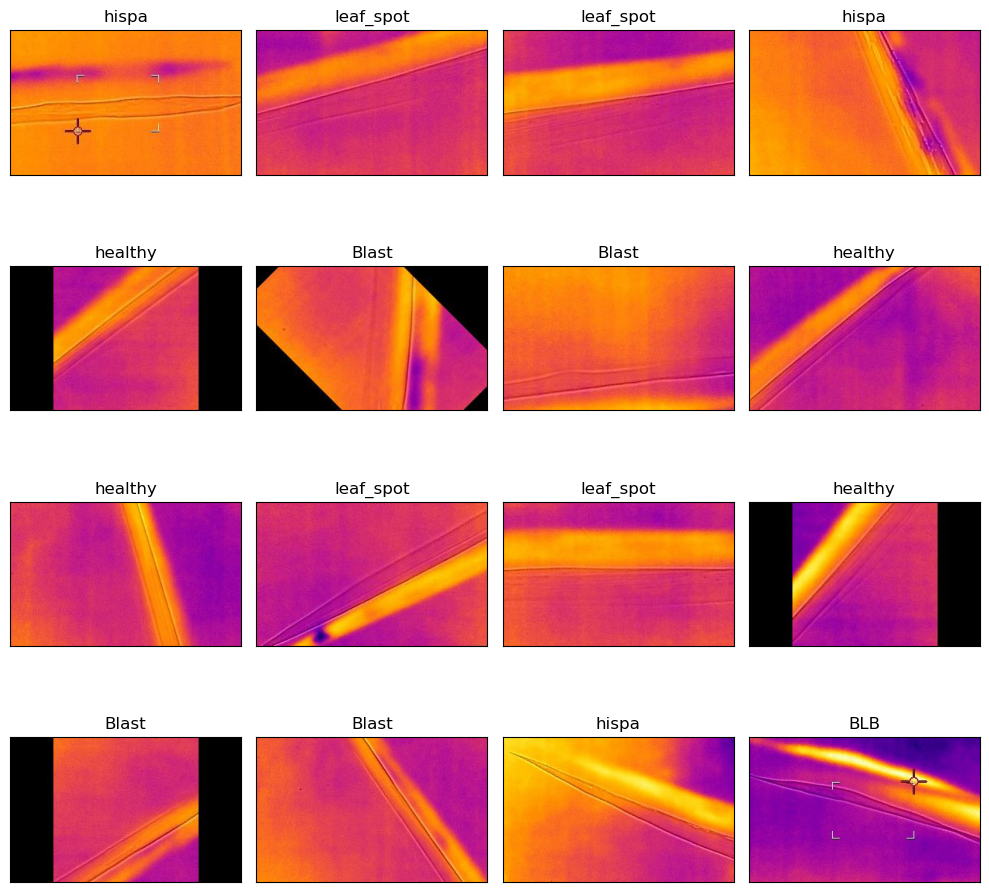

In [61]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [71]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

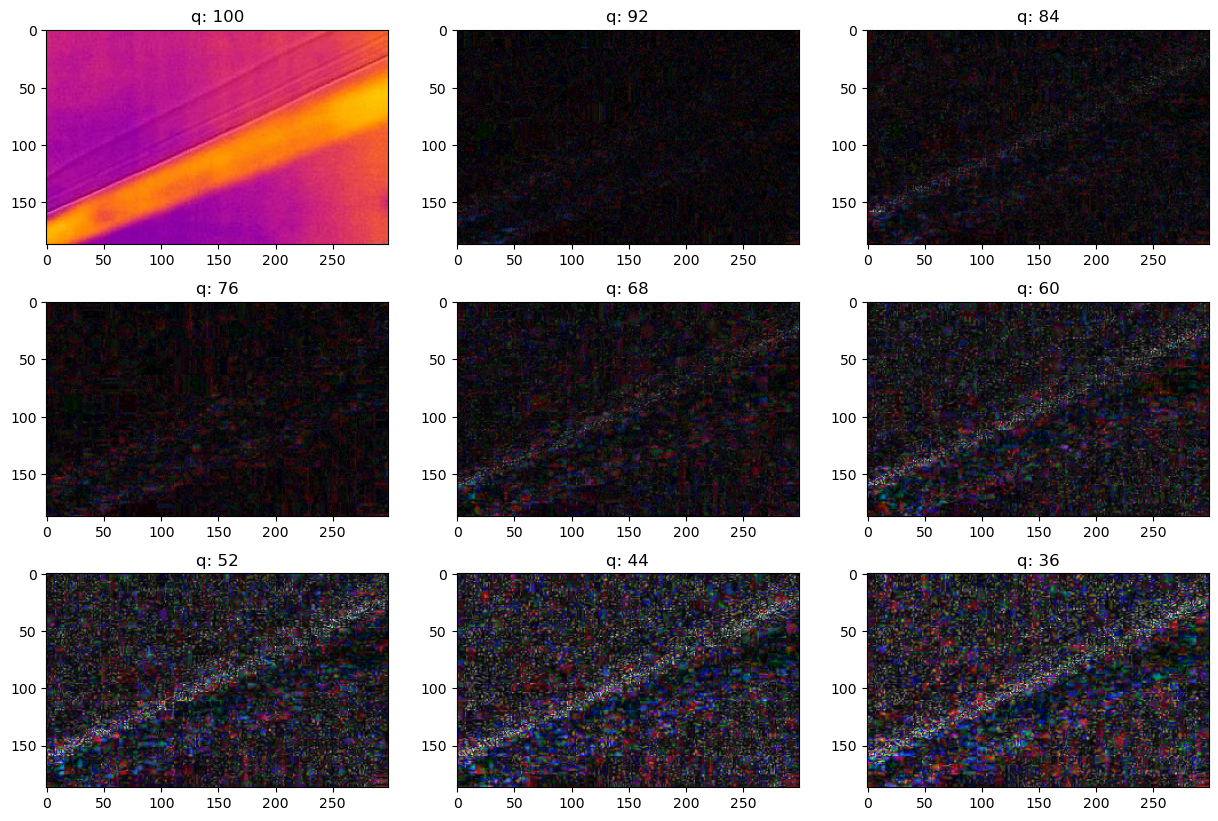

In [77]:
# View random sample from the dataset
p = random_sample('input/plantstressidentification/Dataset/train/leaf_spot')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

## Data Preprocessing

In [112]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [113]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [114]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2816 validated image filenames belonging to 5 classes.
Found 704 validated image filenames belonging to 5 classes.
Found 880 validated image filenames belonging to 5 classes.


In [115]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [116]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [117]:
# Create checkpoint callback
checkpoint_path = "plants_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [118]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

### Training the Model

In [119]:
# 데이터셋에서 클래스 수 확인
num_classes = len(image_df['Label'].unique())
print(f"Number of classes: {num_classes}")

Number of classes: 5


In [120]:
import os

# TensorBoard 로그 디렉터리 경로
log_dir = "training_logs/plant_classification"

# 디렉터리가 존재하지 않으면 생성
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

In [121]:
inputs = pretrained_model.input
x = resize_and_rescale(inputs)

x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.45)(x)


outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = os.path.join(dir_name, experiment_name)
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "plant_classification"),
        checkpoint_callback,
    ]
)

Epoch 1/100
88/88 [==============================] - ETA: 0s - loss: 11.0361 - accuracy: 0.1967

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} training_logs\plant_classification is not a directory [Op:CreateSummaryFileWriter] name: 

In [107]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 3.52048
Test Accuracy: 25.11%


In [109]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

## Making predictions on the Test Data

In [122]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

print(f'The first 5 predictions: {pred[:5]}')

28/28 [==============================] - 7s 180ms/step
The first 5 predictions: ['leaf_spot', 'BLB', 'healthy', 'Blast', 'Blast']


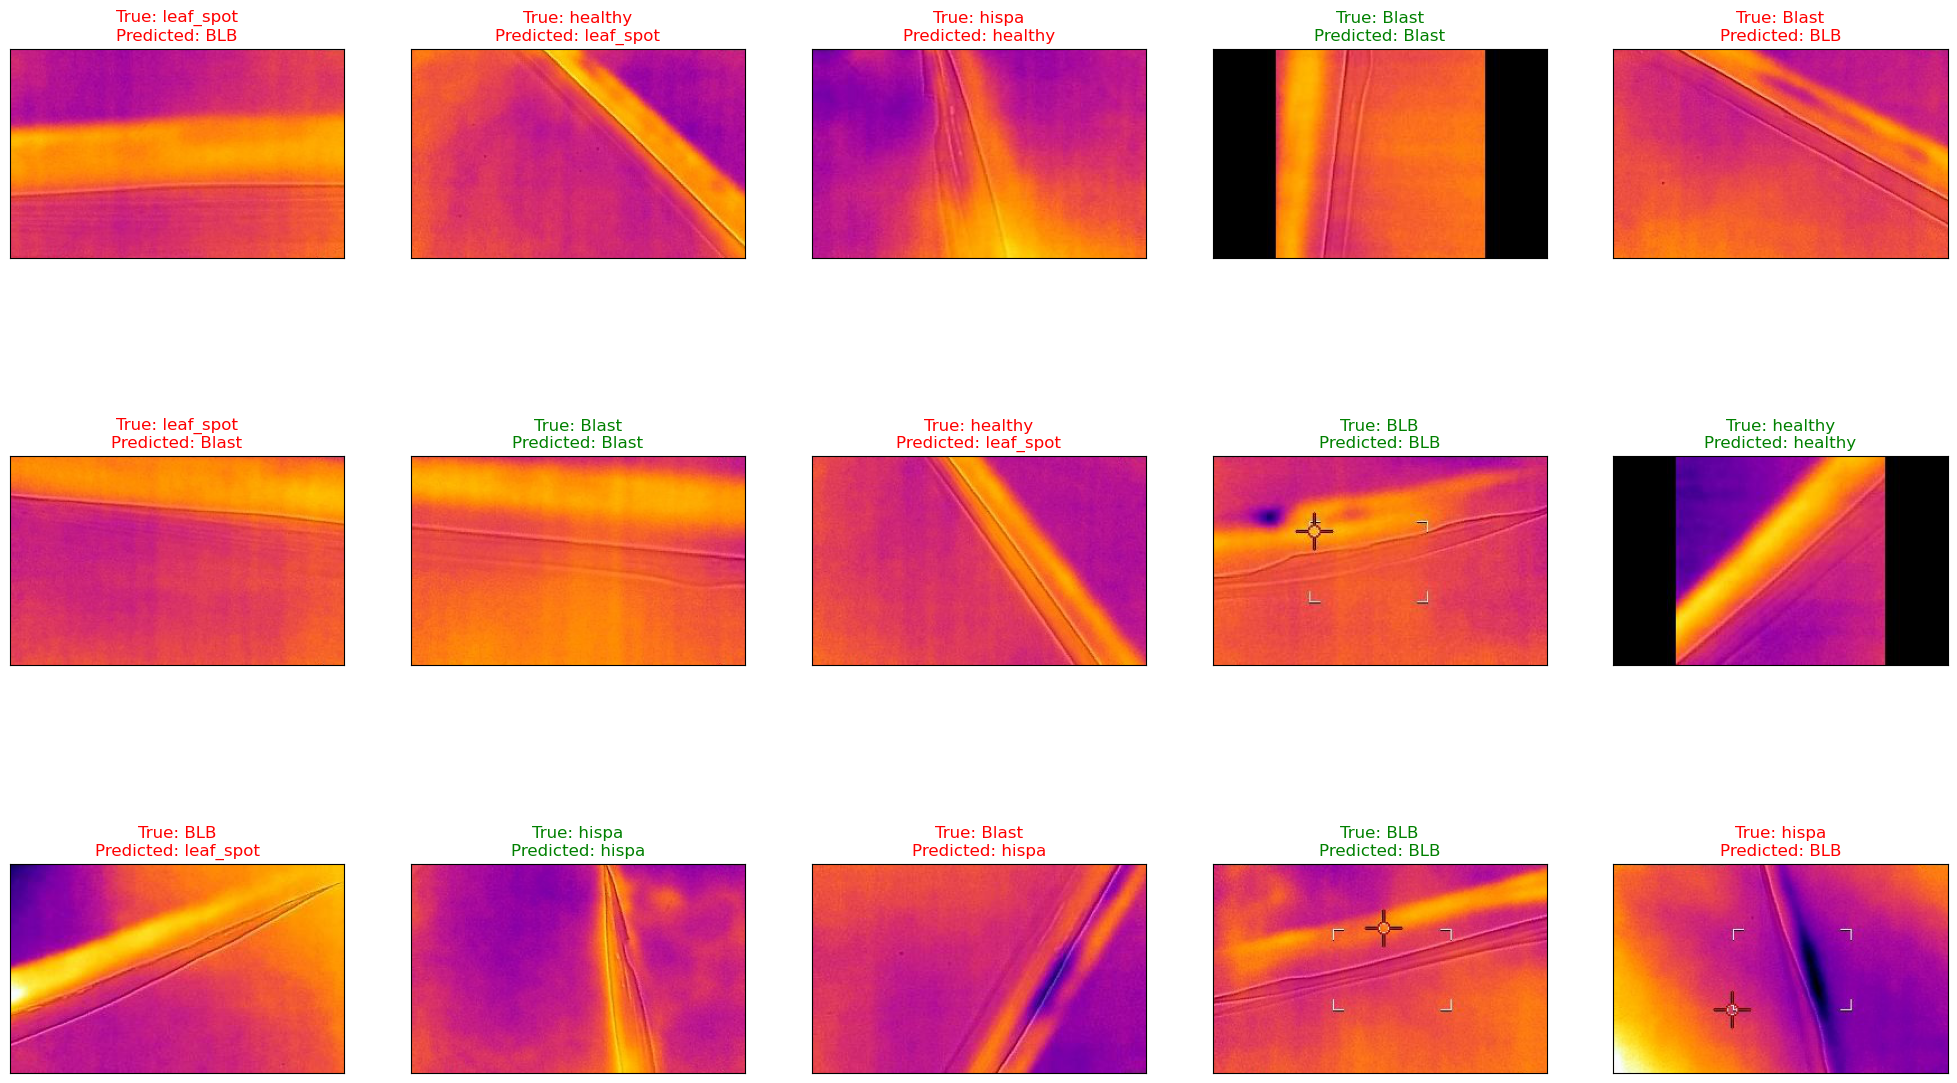

<Figure size 640x480 with 0 Axes>

In [123]:
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

## Plotting the Classification Reports and Confusion Matrix

In [124]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BLB       0.18      0.13      0.15       186
       Blast       0.28      0.38      0.32       190
     healthy       0.21      0.29      0.24       173
       hispa       0.18      0.11      0.14       174
   leaf_spot       0.16      0.12      0.14       157

    accuracy                           0.21       880
   macro avg       0.20      0.21      0.20       880
weighted avg       0.20      0.21      0.20       880



In [125]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score   support
BLB            0.177305  0.134409  0.152905  186.0000
Blast          0.275862  0.378947  0.319290  190.0000
healthy        0.209016  0.294798  0.244604  173.0000
hispa          0.175439  0.114943  0.138889  174.0000
leaf_spot      0.158333  0.121019  0.137184  157.0000
accuracy       0.212500  0.212500  0.212500    0.2125
macro avg      0.199191  0.208823  0.198575  880.0000
weighted avg   0.201065  0.212500  0.201280  880.0000

In [126]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
    
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
        
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

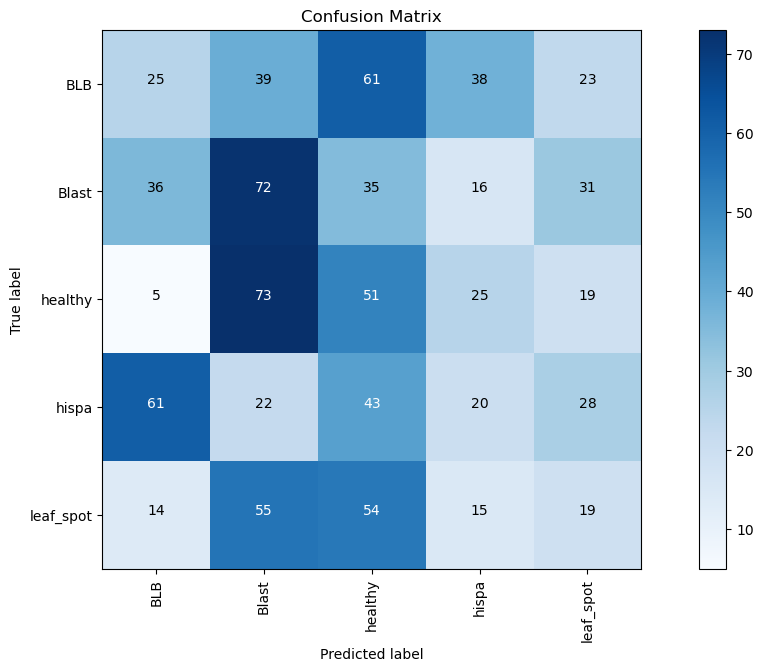

In [127]:
make_confusion_matrix(y_test, pred, list(labels.values()))

## Grad-Cam Visualization

In [128]:
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224, 3)

# Remove last layer's softmax
model.layers[-1].activation = None

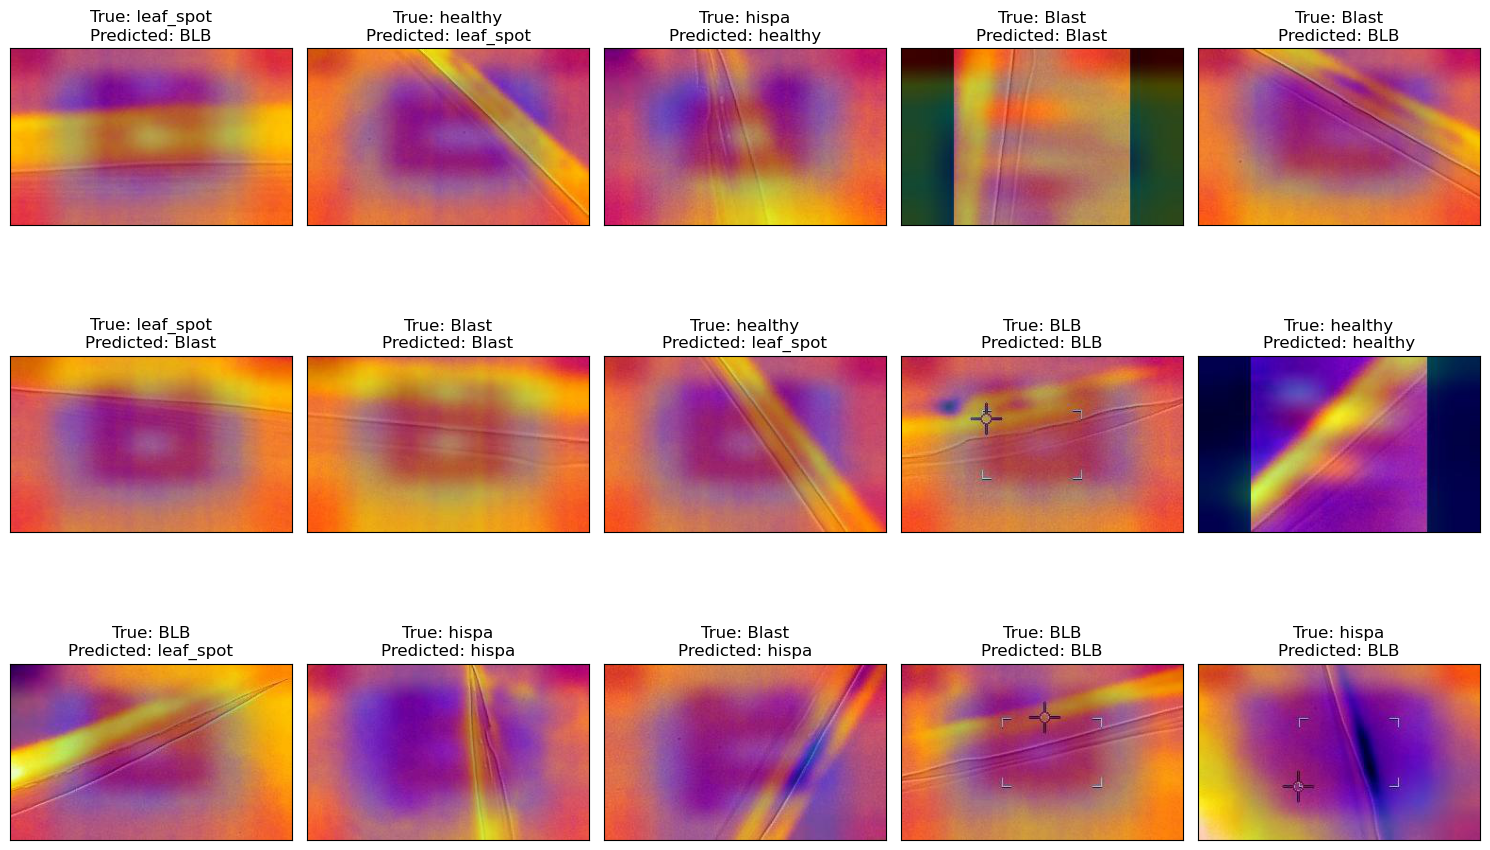

In [129]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")
plt.tight_layout()
plt.show()